In [1]:
import pandas as pd
import re
from numpy import array
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
df = pd.read_csv('Downloads/sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
df.shape

(10314, 3)

In [4]:
#df["label (depression result)"].value_counts()

In [5]:
df.rename(columns={'message to examine':'message', 'label (depression result)':'label'}, inplace=True)

In [6]:
df.head()

,Index,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [7]:
# Tweet Scores
fig = px.histogram(df, x="label")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Tweet Score')
fig.show()

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])

In [11]:
textt = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, relative_scaling=.5).generate(textt)

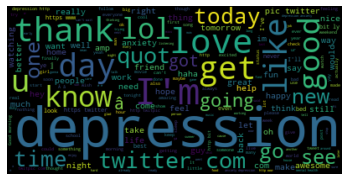

In [12]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud11.png')
plt.show()

In [13]:
# assign reviews with score =1 as positive sentiment
# score =0 negative sentiment
df['sentiment'] = df['label'].apply(lambda rating : +1 if rating !=0 else -1)

In [14]:
df.head()

,Index,message,label,sentiment
0,106,just had a real good moment. i missssssssss hi...,0,-1
1,217,is reading manga http://plurk.com/p/mzp1e,0,-1
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,-1
3,288,@lapcat Need to send 'em to my accountant tomo...,0,-1
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,-1


In [15]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [16]:
#stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href", "twitter", "https"]) 

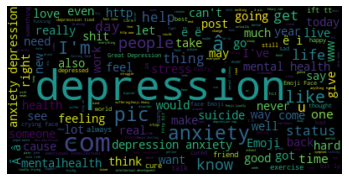

In [17]:
## https and twitter removed because they were included in negative sentiment
pos = " ".join(review for review in positive.message)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

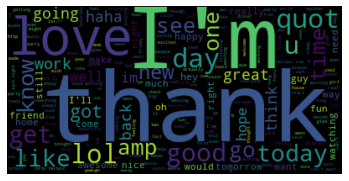

In [18]:
neg = " ".join(review for review in negative.message)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [19]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [20]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['message'] = df['message'].apply(remove_punctuation)

In [21]:
df.head()

,Index,message,label,sentiment,sentimentt
0,106,just had a real good moment i missssssssss him...,0,-1,negative
1,217,is reading manga http//plurkcom/p/mzp1e,0,-1,negative
2,220,@comeagainjen http//twitpiccom/2y2lx - http//w...,0,-1,negative
3,288,@lapcat Need to send 'em to my accountant tomo...,0,-1,negative
4,540,ADD ME ON MYSPACE myspacecom/LookThunder,0,-1,negative


In [22]:
dfNew = df[['message','sentiment']]
dfNew.head()

,message,sentiment
0,just had a real good moment i missssssssss him...,-1
1,is reading manga http//plurkcom/p/mzp1e,-1
2,@comeagainjen http//twitpiccom/2y2lx - http//w...,-1
3,@lapcat Need to send 'em to my accountant tomo...,-1
4,ADD ME ON MYSPACE myspacecom/LookThunder,-1


In [24]:
import numpy as np

In [25]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [26]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['message'])
test_matrix = vectorizer.transform(test['message'])

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [28]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [29]:
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
predictions = lr.predict(X_test)

In [31]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1768,   16],
       [   1,  502]], dtype=int64)

In [32]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      1784
           1       0.97      1.00      0.98       503

    accuracy                           0.99      2287
   macro avg       0.98      0.99      0.99      2287
weighted avg       0.99      0.99      0.99      2287

